In [1]:
# install requirement packages
%pip install graphviz
# remember to install graphviz on you computer also: https://graphviz.org/download/

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import math
from graphviz import Digraph

class Value:
  
    def __init__(self, data, _parents=(), _operator='', label=''):
        self.data = data
        self._prev = set(_parents)
        self._op = _operator
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
  
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

    def __sub__(self, other):
        return Value(self.data - other.data, (self, other), '-')
  
    def __truediv__(self, other):
        if other.data == 0:  # Division by zero check
            raise ValueError("Division by zero is not allowed")
        return Value(self.data / other.data, (self, other), '/')

In [2]:
def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label=f"{{ {n.label} | data {n.data:.1f} }}", shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

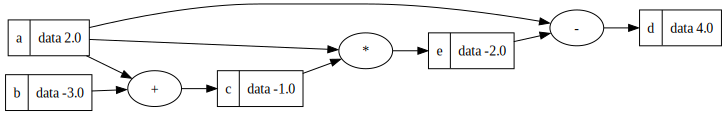

In [3]:
a = Value(2, label='a')
b = Value(-3, label='b')
c = a + b; c.label='c'
e = a * c; e.label = 'e'
d = a - e; d.label = 'd'

draw_dot(d)

In [54]:
trace(e)

({Value(data=-1), Value(data=-2), Value(data=-3), Value(data=2)},
 {(Value(data=-1), Value(data=-2)),
  (Value(data=-3), Value(data=-1)),
  (Value(data=2), Value(data=-1)),
  (Value(data=2), Value(data=-2))})

In [22]:
d = float(12)
type(d)

float

In [58]:
abs(-12)


12

TypeError: object of type 'int' has no len()